In [117]:
#load sentiments_grouped.csv 

import pandas as pd
import numpy as np

df = pd.read_csv('sentiments_grouped.csv')

#df = df.dropna()

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,negative


In [118]:
df.sentiment_group.value_counts()

sentiment_group
negative     183
positive     177
happy        167
fearful      135
surprised     70
Name: count, dtype: int64

In [119]:
df = df.drop_duplicates(subset=['Text','Timestamp', 'Platform'], keep='first')

In [120]:
df.groupby('sentiment_group').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)

/var/folders/td/bwzm0ch95gv3n67hkws8_vwm0000gn/T/ipykernel_74628/731460045.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('sentiment_group').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)
/var/folders/td/bwzm0ch95gv3n67hkws8_vwm0000gn/T/ipykernel_74628/731460045.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('sentiment_group').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)


,len,min,max
sentiment_group,,,
negative,179,10.0,80.0
positive,172,15.0,80.0
happy,157,20.0,80.0
fearful,134,10.0,80.0
surprised,68,20.0,80.0


<Axes: xlabel='Platform'>

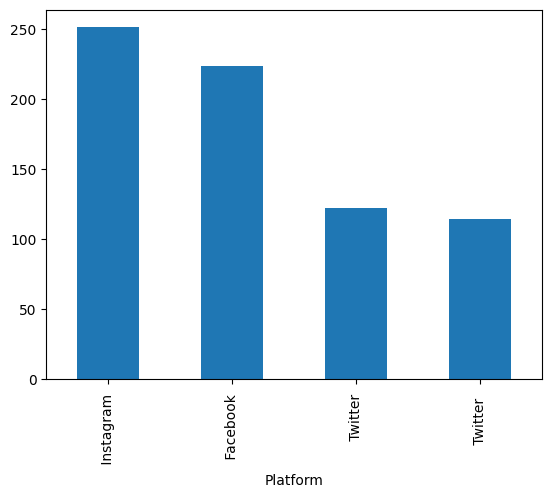

In [121]:
#split databse based on platform    

twitter = df[df['Platform'] == 'Twitter']
instagram = df[df['Platform'] == 'Instagram']
facebook = df[df['Platform'] == 'Facebook']

import matplotlib.pyplot as plt

#plotting the number of counts of platform based 

df['Platform'].value_counts().plot(kind='bar')



/var/folders/td/bwzm0ch95gv3n67hkws8_vwm0000gn/T/ipykernel_74628/2038342537.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('Platform').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).plot(kind='bar')
/var/folders/td/bwzm0ch95gv3n67hkws8_vwm0000gn/T/ipykernel_74628/2038342537.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('Platform').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).plot(kind='bar')


<Axes: xlabel='Platform'>

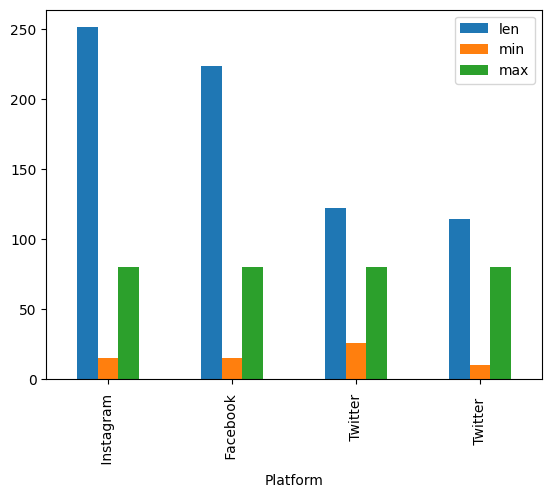

In [122]:
#plot likes of platform based

df.groupby('Platform').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).plot(kind='bar')

In [123]:
pip install wordcloud

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


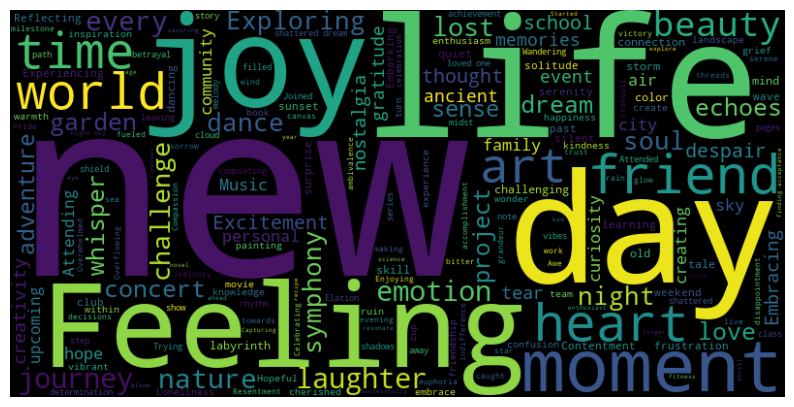

In [124]:
#Word Frequency and Text Analysis: Use natural language processing to identify common words, phrases, and topics, utilizing tools like word clouds or TF-IDF analysis.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of words

text = df['Text'].values

# Join the list of words into a single string

text = ' '.join(text)

# Create the word cloud object

wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud

plt.figure(figsize=(10,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()



In [125]:
#unique values in the column 'sentiment'

len(df['Sentiment'].unique())

278

In [126]:
#unique values in the column 'processed_sentiment'

len(df['sentiment_group'].unique())

5

In [127]:
#sentiment_group unique values
df['sentiment_group'].unique()


array(['positive', 'negative', 'fearful', 'happy', 'surprised'],
      dtype=object)

Data Preprocessing:

In [128]:
#Clean the text data by removing irrelevant information such as URLs, special characters, and emojis.

import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text) #remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove special characters
    text = text.encode('ascii', 'ignore').decode('ascii') #remove emojis
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying a beautiful day at the park ...
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic was terrible this morning ...
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,Just finished an amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited about the upcoming weekend getaway ...
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,negative,Trying out a new recipe for dinner tonight ...


In [129]:
pip install nltk

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [130]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensuring the necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and convert words to lower case
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Assuming 'df' is your DataFrame and it has a column 'cleaned_text' that contains text
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# Display the first few rows to verify the changes
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dabeer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dabeer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,negative,Trying new recipe dinner tonight


In [131]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /Users/dabeer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [132]:
#Normalize the text by converting it to lowercase and lemmatizing or stemming words to reduce variation.

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

In [133]:
df.head(10)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text,lemmatized_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying beautiful day park,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic terrible morning,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,finished amazing workout,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited upcoming weekend getaway,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,negative,Trying new recipe dinner tonight,trying new recipe dinner tonight
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,positive,positive,Feeling grateful little things life,feeling grateful little thing life
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,positive,positive,Rainy days call cozy blankets hot cocoa,rainy day call cozy blanket hot cocoa
7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19,positive,positive,new movie release mustwatch,new movie release mustwatch
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8,negative,negative,Political discussions heating timeline,political discussion heating timeline
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12,neutral,negative,Missing summer vibes beach days,missing summer vibe beach day


In [134]:
#TF-IDF Analysis

from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer object

vectorizer = TfidfVectorizer()

# Fit the vectorizer object to the text data

X = vectorizer.fit_transform(df['cleaned_text'])

# Create a DataFrame from the TF-IDF array

df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

#retain only the top 10 words

df_tfidf = df_tfidf.sum().sort_values(ascending=False).head(20)

df_tfidf

new           10.629767
feeling        7.409430
day            7.350626
like           6.324173
beauty         6.217815
night          5.973119
heart          5.741334
world          5.687189
laughter       5.545268
joy            5.436414
friends        5.361101
art            5.202479
journey        5.199251
personal       5.153783
excitement     5.142153
dreams         5.098968
life           5.022315
exploring      4.929503
lost           4.928925
lifes          4.864844
dtype: float64

More Feature Engineering

In [135]:
#bag of words model

from sklearn.feature_extraction.text import CountVectorizer

# Create the vectorizer object

vectorizer = CountVectorizer()

# Fit the vectorizer object to the text data

X = vectorizer.fit_transform(df['cleaned_text'])

# Create a DataFrame from the word count array

df_word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame

df_word_count.head()

,ablaze,abstract,abyss,academic,acceptance,accepts,accidentally,accomplished,accomplishing,accomplishment,...,yearbook,yearning,years,yet,york,young,zen,zero,zest,zestful
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
#choose the top 10 words

df_word_count.sum().sort_values(ascending=False).head(20)

new          43
like         27
feeling      26
day          26
heart        23
night        22
joy          22
world        21
art          21
beauty       20
dreams       20
journey      20
laughter     20
life         19
every        19
symphony     17
friends      17
sky          17
exploring    17
lost         17
dtype: int64

In [137]:
from nltk import ngrams
from nltk.tokenize import word_tokenize

def generate_ngrams(text, n=2):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Applying n-grams function to the 'text' column
df['bigrams'] = df['Text'].apply(generate_ngrams)

# Output the DataFrame
print(df[['Text', 'bigrams']])

                                                  Text  \
0     Enjoying a beautiful day at the park!        ...   
1     Traffic was terrible this morning.           ...   
2     Just finished an amazing workout! 💪          ...   
3     Excited about the upcoming weekend getaway!  ...   
4     Trying out a new recipe for dinner tonight.  ...   
..                                                 ...   
727  Collaborating on a science project that receiv...   
728  Attending a surprise birthday party organized ...   
729  Successfully fundraising for a school charity ...   
730  Participating in a multicultural festival, cel...   
731  Organizing a virtual talent show during challe...   

                                               bigrams  
0    [Enjoying a, a beautiful, beautiful day, day a...  
1    [Traffic was, was terrible, terrible this, thi...  
2    [Just finished, finished an, an amazing, amazi...  
3    [Excited about, about the, the upcoming, upcom...  
4    [Trying out, 

In [138]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text,lemmatized_text,bigrams
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying beautiful day park,enjoying beautiful day park,"[Enjoying a, a beautiful, beautiful day, day a..."
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic terrible morning,traffic terrible morning,"[Traffic was, was terrible, terrible this, thi..."
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,finished amazing workout,finished amazing workout,"[Just finished, finished an, an amazing, amazi..."
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited upcoming weekend getaway,excited upcoming weekend getaway,"[Excited about, about the, the upcoming, upcom..."
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,negative,Trying new recipe dinner tonight,trying new recipe dinner tonight,"[Trying out, out a, a new, new recipe, recipe ..."


In [139]:
pip install transformers


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


Implement pre trained model, use transfer learning, try multiclass logistic regression, and transfer learning on maybe a bert model, and fine tune it
-implement few models on the feature engineering features like "bigram", "lemmatized text", 'bag of words', and 'IMDF ANALYSIS'
-cross validate then

In [140]:
#bert tokenization
from transformers import BertTokenizer
tokenizer   = BertTokenizer.from_pretrained('bert-base-uncased')

In [141]:
x = df['Text'].values
y = df['sentiment_group'].values
sequence = [sequence for sequence in x]

model_inputs = tokenizer(sequence, padding=True, truncation=True, max_length=512, return_tensors="tf") #or pt?


# Tokenize the text



In [142]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((model_inputs['input_ids'], y))

In [143]:
dataset = dataset.cache()
dataset =dataset.shuffle(1000).batch(16)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [144]:
import tensorflow as tf

total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.2 * total_size)
test_size = int(0.1 * total_size)

train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)


In [145]:
MAX_SEQUENCE_LENGTH = 512

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, Bidirectional

model = Sequential(name='sentiment_analysis')
model.add(Embedding(input_dim=len(tokenizer.get_vocab()), output_dim=32))
model.add(Bidirectional(LSTM(32, activation='tanh', return_sequences=True)))
model.add(Dropout(0.5))  # Optional: add dropout for regularization
model.add(Flatten())  # Flatten the outputs for dense layers if return_sequences=True
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Optional: add another dropout layer
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Change to 5 output units with softmax

model.summary()

Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [147]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change loss function
              metrics=['accuracy'])


In [148]:
model.summary()

Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [149]:
pip install --upgrade tensorflow keras


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [150]:
from transformers import BertTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Prepare the text data
x = df['Text'].values  # The column with text inputs

# Prepare the labels
y = df['sentiment_group'].values  # The column with sentiment labels
label_encoder = LabelEncoder()
y_integers = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_integers)

# Tokenize the text data
model_inputs = tokenizer(list(x), padding=True, truncation=True, max_length=512, return_tensors="tf")

# Create a TensorFlow Dataset object
dataset = tf.data.Dataset.from_tensor_slices((model_inputs['input_ids'], y_onehot))

# Shuffle, batch, and prefetch the dataset
batch_size = 16
dataset = dataset.shuffle(len(x)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Calculate dataset sizes for split
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = int(0.15 * total_size)

# Split the dataset into train, validation, and test sets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# Define the model architecture
model = Sequential(name='sentiment_analysis')
model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 512, 32)        │       976,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ (None, 512, 64)        │        16,640 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_10         │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,973 (3.95 MB)

 Trainable params: 1,035,973 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

the following model is weirdly too good

lets try k cross validation

In [154]:
with tf.device('/GPU:0'):
    history = model.fit(train_dataset, batch_size = 16, validation_data=val_dataset, epochs=200)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8903 - loss: 0.7699 - val_accuracy: 0.8750 - val_loss: 0.3950
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9093 - loss: 0.3724 - val_accuracy: 0.9271 - val_loss: 0.2194
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9496 - loss: 0.1916 - val_accuracy: 0.9896 - val_loss: 0.0412
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9807 - loss: 0.1092 - val_accuracy: 0.9896 - val_loss: 0.0576
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9923 - loss: 0.0382 - val_accuracy: 0.9896 - val_loss: 0.0579
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9894 - loss: 0.0585 - val_accuracy: 0.9896 - val_loss: 0.0555
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9812 - loss: 0.0839 - val_accuracy: 0.9896 - val_loss: 0.0697
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9998 - loss: 0.0124 - val_accuracy: 1.00

In [155]:
#test model on test dataset

model.evaluate(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.6269e-07 


[2.098577738252061e-07, 1.0]

k fold now

In [153]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from transformers import BertTokenizer, TFBertModel

# Load the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample data loading
# Prepare the text data
x = df['Text'].values  # The column with text inputs

# Prepare the labels
y = df['sentiment_group'].values  # The column with sentiment labels
# label_encoder = LabelEncoder()

# Encoding labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Tokenize the text data
tokenized_data = tokenizer(list(x), padding=True, truncation=True, max_length=512, return_tensors="np")
input_ids = tokenized_data['input_ids']

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Variables for model evaluation
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
for fold_no, (train, test) in enumerate(kfold.split(input_ids, y_onehot), 1):
    print(f'Training fold {fold_no}...')

    # Create model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(512,), dtype=tf.int32, name='input_ids'),
        tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.GlobalMaxPool1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit data to model
    history = model.fit(input_ids[train], y_onehot[train],
                        batch_size=16, epochs=50,
                        validation_data=(input_ids[test], y_onehot[test]))

    # Generate generalization metrics
    scores = model.evaluate(input_ids[test], y_onehot[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(num_folds):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Training fold 1...
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2316 - loss: 1.6001 - val_accuracy: 0.2324 - val_loss: 1.5751
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2638 - loss: 1.5745 - val_accuracy: 0.2324 - val_loss: 1.5690
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2762 - loss: 1.5494 - val_accuracy: 0.3099 - val_loss: 1.5474
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3399 - loss: 1.4468 - val_accuracy: 0.4155 - val_loss: 1.3834
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4922 - loss: 1.2325 - val_accuracy: 0.4789 - val_loss: 1.3167
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6735 - loss: 0.8023 - val_accuracy: 0.4930 - val_loss: 1.4249
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7967 - loss: 0.5233 - val_accuracy: 0.4789 - val_loss: 1.6638
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8541 - loss: 0.3578 - val_acc

In [156]:
#on lemmatized text

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from transformers import BertTokenizer, TFBertModel

# Load the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample data loading
# Prepare the text data
x = df['lemmatized_text'].values  # The column with text inputs

# Prepare the labels
y = df['sentiment_group'].values  # The column with sentiment labels
# label_encoder = LabelEncoder()

# Encoding labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Tokenize the text data
tokenized_data = tokenizer(list(x), padding=True, truncation=True, max_length=512, return_tensors="np")
input_ids = tokenized_data['input_ids']

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Variables for model evaluation
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
for fold_no, (train, test) in enumerate(kfold.split(input_ids, y_onehot), 1):
    print(f'Training fold {fold_no}...')

    # Create model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(512,), dtype=tf.int32, name='input_ids'),
        tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.GlobalMaxPool1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit data to model
    history = model.fit(input_ids[train], y_onehot[train],
                        batch_size=16, epochs=50,
                        validation_data=(input_ids[test], y_onehot[test]))

    # Generate generalization metrics
    scores = model.evaluate(input_ids[test], y_onehot[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(num_folds):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Training fold 1...
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2586 - loss: 1.5923 - val_accuracy: 0.2465 - val_loss: 1.5723
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2364 - loss: 1.5872 - val_accuracy: 0.2465 - val_loss: 1.5744
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2448 - loss: 1.5462 - val_accuracy: 0.3310 - val_loss: 1.5546
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3293 - loss: 1.4638 - val_accuracy: 0.3873 - val_loss: 1.4585
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4993 - loss: 1.0252 - val_accuracy: 0.4437 - val_loss: 1.5395
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7467 - loss: 0.6792 - val_accuracy: 0.4155 - val_loss: 1.7691
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7642 - loss: 0.5184 - val_accuracy: 0.4789 - val_loss: 1.6863
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8798 - loss: 0.3105 - val_accuracy

In [ ]:
pip install tf-keras

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import BertTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Prepare the text data
x = df['lemmatized_text'].values  # The column with text inputs

# Prepare the labels
y = df['sentiment_group'].values  # The column with sentiment labels
label_encoder = LabelEncoder()
y_integers = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_integers)

# Tokenize the text data
model_inputs = tokenizer(list(x), padding=True, truncation=True, max_length=512, return_tensors="tf")

# Create a TensorFlow Dataset object
dataset = tf.data.Dataset.from_tensor_slices((model_inputs['input_ids'], y_onehot))

# Shuffle, batch, and prefetch the dataset
batch_size = 16
dataset = dataset.shuffle(len(x)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Calculate dataset sizes for split
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = int(0.15 * total_size)

# Split the dataset into train, validation, and test sets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# Define the model architecture
model = Sequential(name='sentiment_analysis')
model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 512, 32)        │       976,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 512, 64)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 278)            │        71,446 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,106,134 (4.22 MB)

 Trainable params: 1,106,134 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(train_dataset, batch_size = 16, validation_data=val_dataset, epochs=1000)

Epoch 1/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0000e+00 - loss: 5.6265 - val_accuracy: 0.0000e+00 - val_loss: 5.6257
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0211 - loss: 5.6237 - val_accuracy: 0.0417 - val_loss: 5.6225
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0326 - loss: 5.6220 - val_accuracy: 0.0417 - val_loss: 5.6228
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0522 - loss: 5.6177 - val_accuracy: 0.0938 - val_loss: 5.6172
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0677 - loss: 5.6105 - val_accuracy: 0.0938 - val_loss: 5.6136
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0504 - loss: 5.6013 - val_accuracy: 0.0521 - val_loss: 5.6156
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0731 - loss: 5.5885 - val_accuracy: 0.0833 - val_loss: 5.6045
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0710 - loss: 5.5647 - val_accura

fine tuning bert model, and adding own layer isnt working well

In [170]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Example DataFrame loading and preprocessing
# df = pd.read_csv('your_dataset.csv')  # Assuming DataFrame 'df' is already loaded
x = df['Text'].values
y = df['sentiment_group'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded, num_classes=len(set(y_encoded)))

# Tokenize text data
inputs = tokenizer(list(x), max_length=512, truncation=True, padding=True, return_tensors="tf")
input_ids = inputs['input_ids'].numpy()  # Convert to numpy array
attention_masks = inputs['attention_mask'].numpy()  # Convert to numpy array

# Create TensorFlow datasets
dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': input_ids, 'attention_mask': attention_masks}, y_onehot))

# Shuffling and batching the dataset
dataset = dataset.shuffle(buffer_size=10000).batch(16)

# Splitting the dataset
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size  # Ensure all data is used

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# Print out the sizes to confirm
print(f"Total: {total_size}, Train: {train_size}, Val: {val_size}, Test: {test_size}")

# Now, you can proceed with model compilation and training.

# Compiling the model with the Adam optimizer and a suitable loss function

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

# Model training
model.fit(train_dataset, epochs=100, validation_data=val_dataset)

# Model evaluation
model.evaluate(val_dataset)


Total: 45, Train: 31, Val: 6, Test: 8
Epoch 1/100
31/31 [==============================] - 38s 830ms/step - loss: 1.5864 - accuracy: 0.2339 - val_loss: 1.5822 - val_accuracy: 0.1562
Epoch 2/100
31/31 [==============================] - 21s 666ms/step - loss: 1.5717 - accuracy: 0.2399 - val_loss: 1.5829 - val_accuracy: 0.2083
Epoch 3/100
31/31 [==============================] - 23s 731ms/step - loss: 1.5778 - accuracy: 0.2681 - val_loss: 1.5726 - val_accuracy: 0.2604
Epoch 4/100
31/31 [==============================] - 28s 881ms/step - loss: 1.5835 - accuracy: 0.2319 - val_loss: 1.5640 - val_accuracy: 0.3333
Epoch 5/100
31/31 [==============================] - 34s 1s/step - loss: 1.5765 - accuracy: 0.2298 - val_loss: 1.5584 - val_accuracy: 0.2812
Epoch 6/100
31/31 [==============================] - 40s 1s/step - loss: 1.5660 - accuracy: 0.2278 - val_loss: 1.5200 - val_accuracy: 0.2604
Epoch 7/100
31/31 [==============================] - 36s 1s/step - loss: 1.5835 - accuracy: 0.2298 - val

In [ ]:
model.summary()

Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 512, 32)        │       976,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 512, 64)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 278)            │        71,446 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,318,404 (12.66 MB)

 Trainable params: 1,106,134 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,212,270 (8.44 MB)

In [ ]:
#implement distilbert https://www.kaggle.com/code/mukaffimoin/social-media-sentiments-analysis-using-distilbert#Evaluate-Model